# Implement this analysis in the Vorticity field 4 EKE.

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
import seawater as sw

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import velocity fields values to python environment.

ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
ssh=ncfile.variables['eta_t'][0,:,:]
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])
mask=ma.getmask(ssh[:,:])


In [4]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:]/100)
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

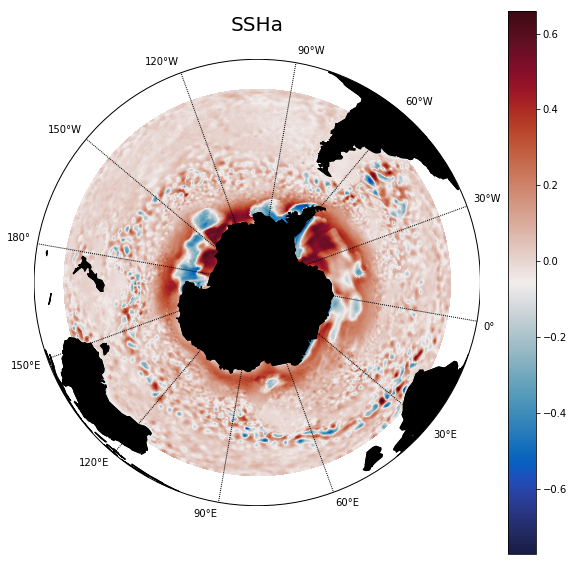

In [5]:
basemap_mplot(lon,lat,ssh-ssh_mean,title="SSHa",scale='Lin',cmap=cm.cm.balance,\
              vmin='',vmax='',xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

# Check this calculation

In [29]:
def geovelfield(ssha,lat):
    omega = 7.2921e-5
    g=9.81
    f=2*omega*sin(np.deg2rad(lat))
    u=zeros(shape(ssh))
    v=zeros(shape(ssh))
    for ii in range(shape(ssh)[1]-1):
        detax=ssh[0:-1,ii]/mean(sw.dist(0,lon,'km')[0][:]*1000)
        v[0:-1,ii]=(g/f[0:-1])*(detax)
    for jj in range(shape(ssh)[0]-1):
        detay=ssh[jj,0:-1]/mean(sw.dist(lat,0,'km')[0][:]*1000)
        u[jj,0:-1]=-(g/f[jj])*(detay)
    return u,v

u_g,v_g=geovelfield(ssh,lat)

u_g=np.ma.masked_array(u_g, mask)
v_g=np.ma.masked_array(v_g, mask)

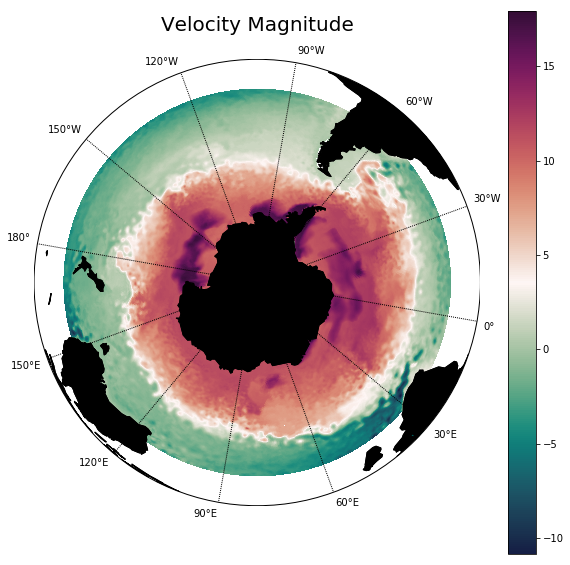

In [30]:
basemap_mplot(lon,lat,v_g,title="Velocity Magnitude",scale='Lin',cmap=cm.cm.curl,\
              vmin='',vmax='',xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

In [31]:
def vorticity2D(u,v):
    dv_x=np.gradient(v[:,:],axis=1)
    du_y=np.gradient(u[:,:],axis=0)
    w=dv_x-du_y
    return w

w=vorticity2D(u_g,v_g)

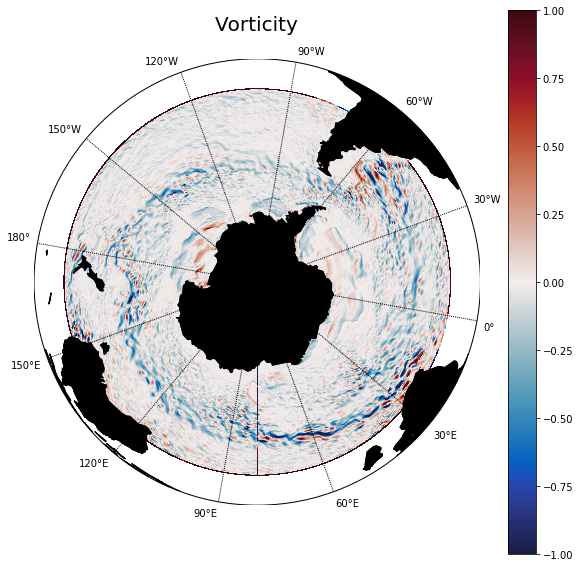

In [32]:
basemap_mplot(lon,lat,w,title="Vorticity",scale='Lin',cmap=cm.cm.balance,\
              vmin=-1,vmax=1,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()
# EkE=0.5 * (u_avg**2 + v_avg**2)

In [33]:
eddytd=analyseddyzt(w,lon,lat,0,1,1,1,0.1,0.1,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 87 s  

In [34]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,w,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


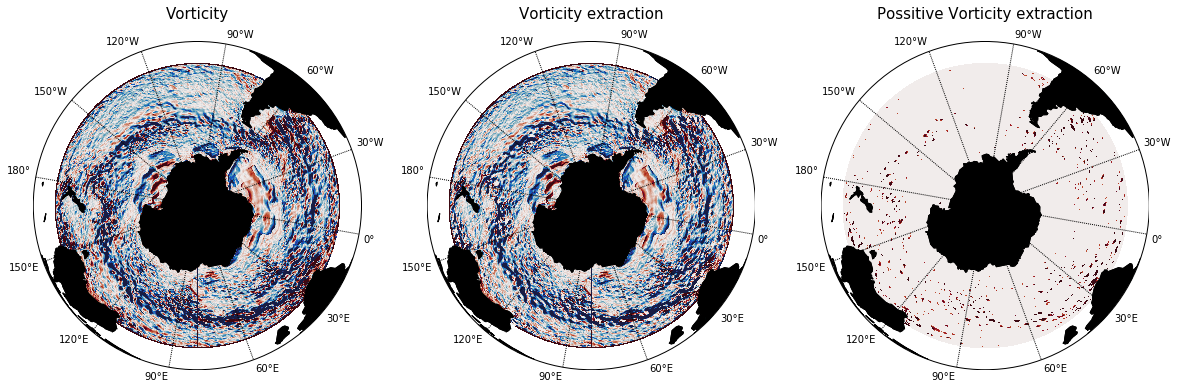

In [35]:
basemap_mplot(lon,lat,[w,w-eddysplot,eddysplot]\
              ,title=["Vorticity","Vorticity extraction","Possitive Vorticity extraction"],scale='Lin',\
              cmap=cm.cm.balance,vmin=-0.2,vmax=0.2,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [36]:
eddytdn=analyseddyzt(w,lon,lat,0,1,1,-1,-0.1,-0.1,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 144 s  

In [37]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,w,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


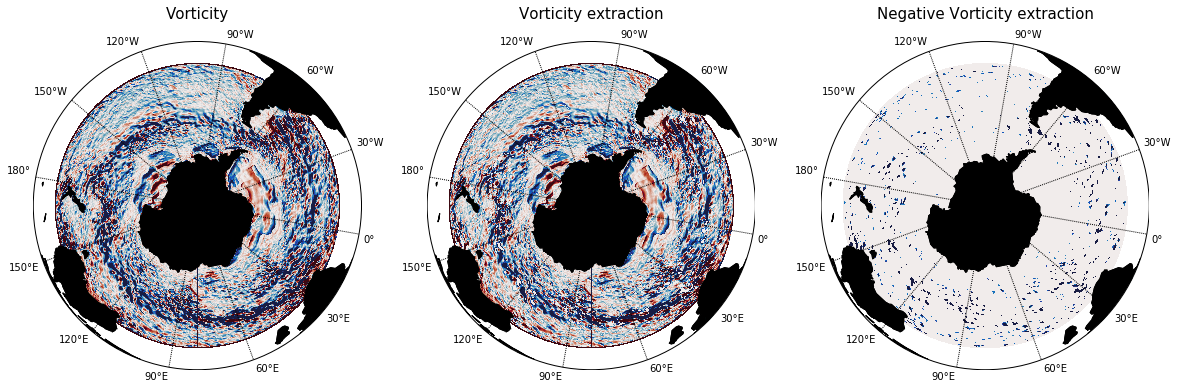

In [38]:
basemap_mplot(lon,lat,[w,w-eddysplotn,eddysplotn]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=1,yan=3,figsize=(20,20),fontsize=15);

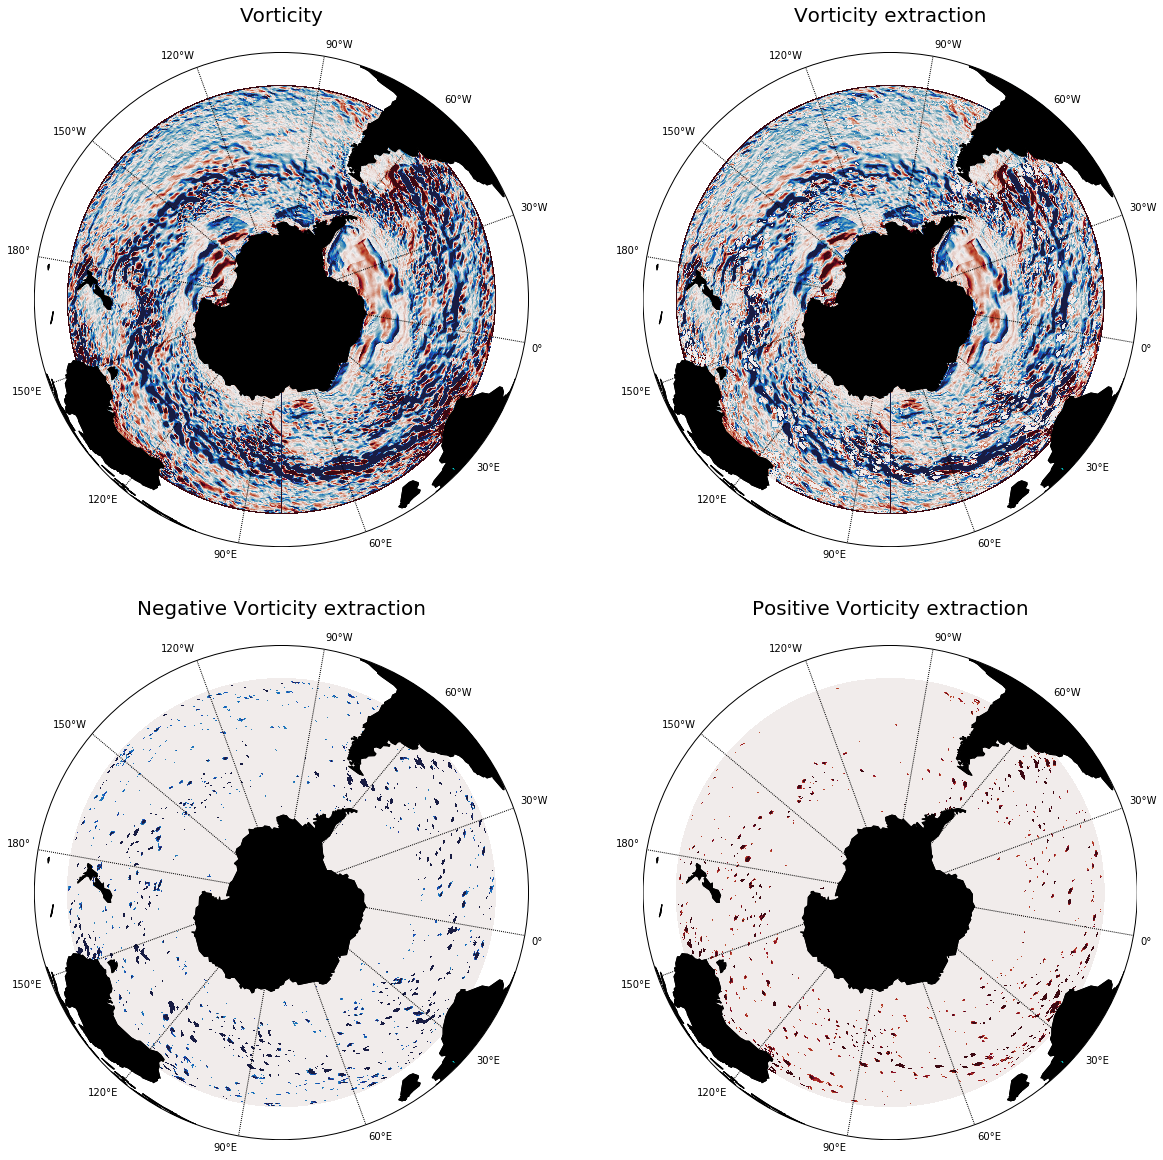

In [39]:
basemap_mplot(lon,lat,[w,w-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction",\
                       "Positive Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=20);

In [40]:
threshold=3
eddysup=exeddy(eddytd,lat,lon,u_g,0,threshold,inside=w,diagnostics=False)
eddysun=exeddy(eddytdn,lat,lon,u_g,0,threshold,inside=w,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


In [41]:
threshold=3
eddysvp=exeddy(eddytd,lat,lon,v_g,0,threshold,inside=w,diagnostics=False)
eddysvn=exeddy(eddytdn,lat,lon,v_g,0,threshold,inside=w,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


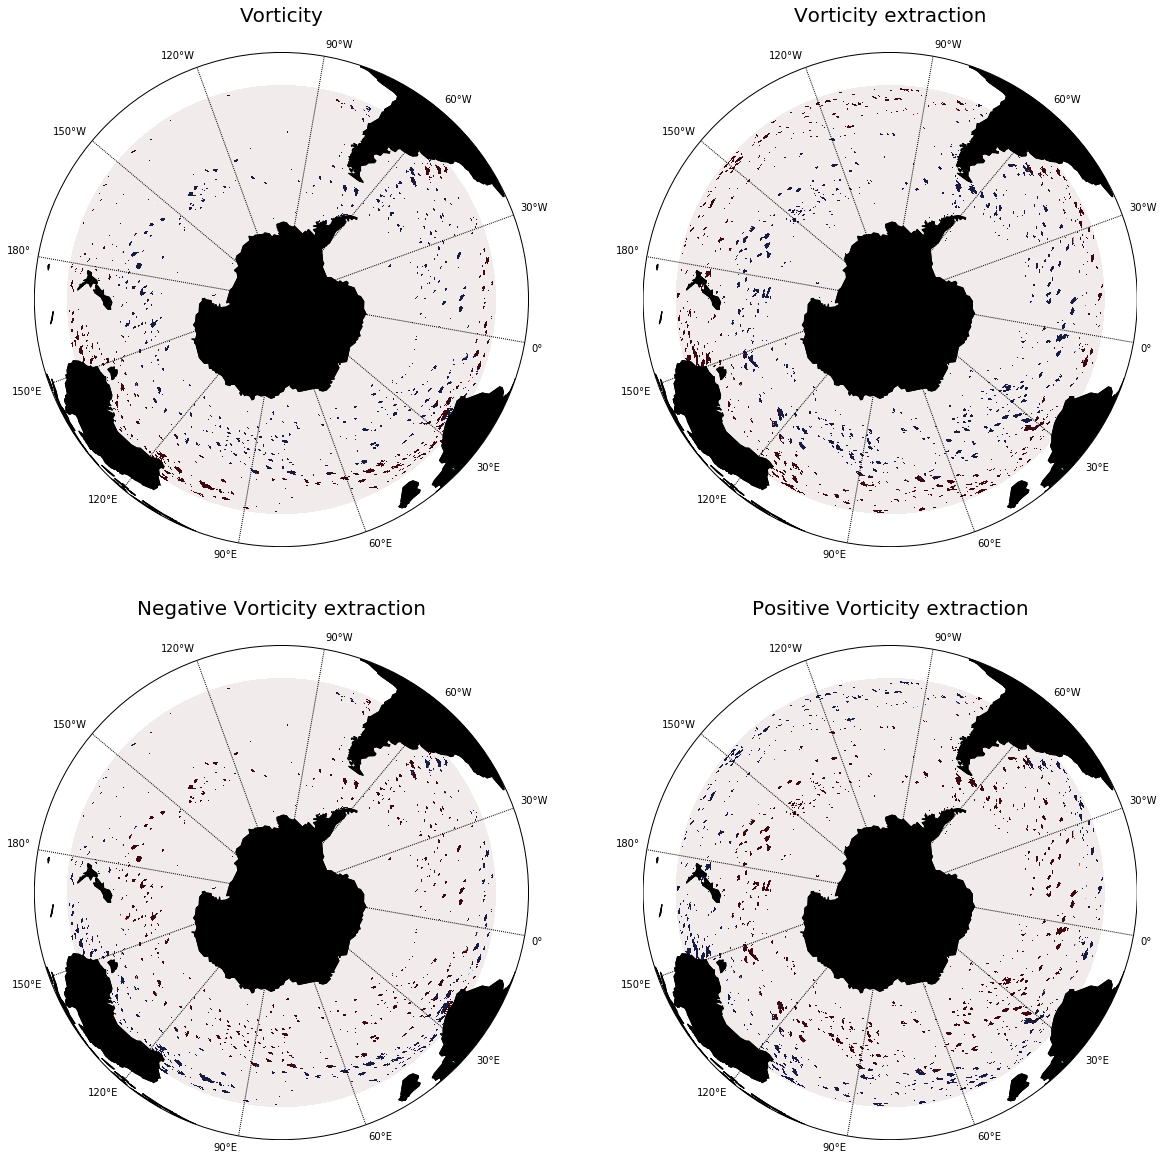

In [42]:
basemap_mplot(lon,lat,[eddysup,eddysun,eddysvp,eddysvn]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction",\
                       "Positive Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=20);

# EKE

In [49]:
eddyu=(eddysun+eddysup)
eddyv=(eddysvn+eddysvp)

In [50]:
def KE(u,v):
    ke=(1/2)*(u**2+v**2)
    return ke

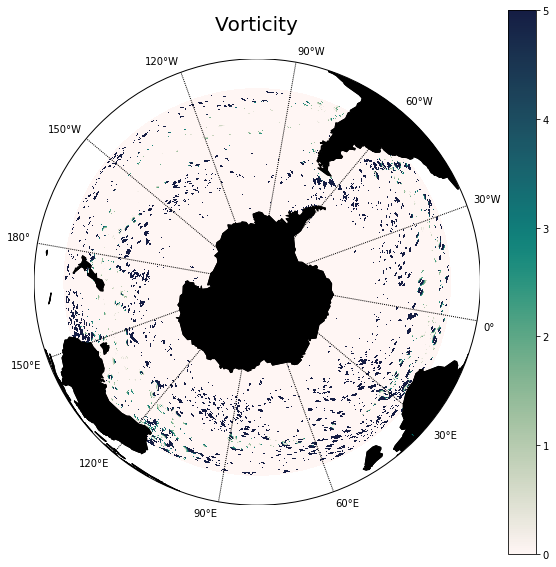

In [58]:
eke=KE(eddyu,eddyv)

basemap_mplot(lon,lat,eke,title="Vorticity",scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=5,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

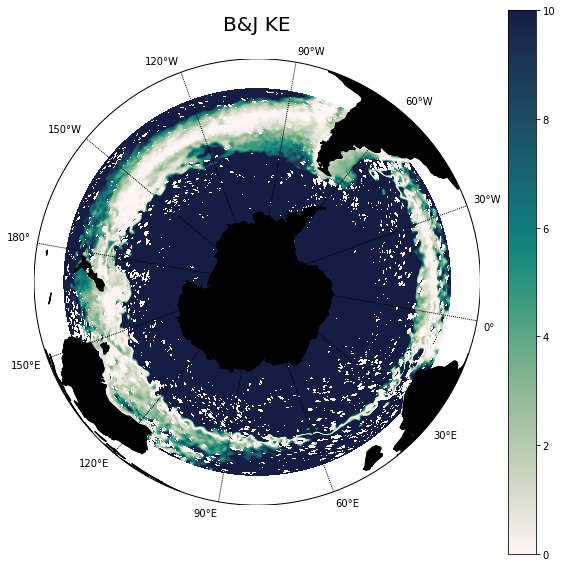

In [62]:
bjke=KE(u_g-eddyu,v_g-eddyv)
basemap_mplot(lon,lat,bjke,title="B&J KE",scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=10,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

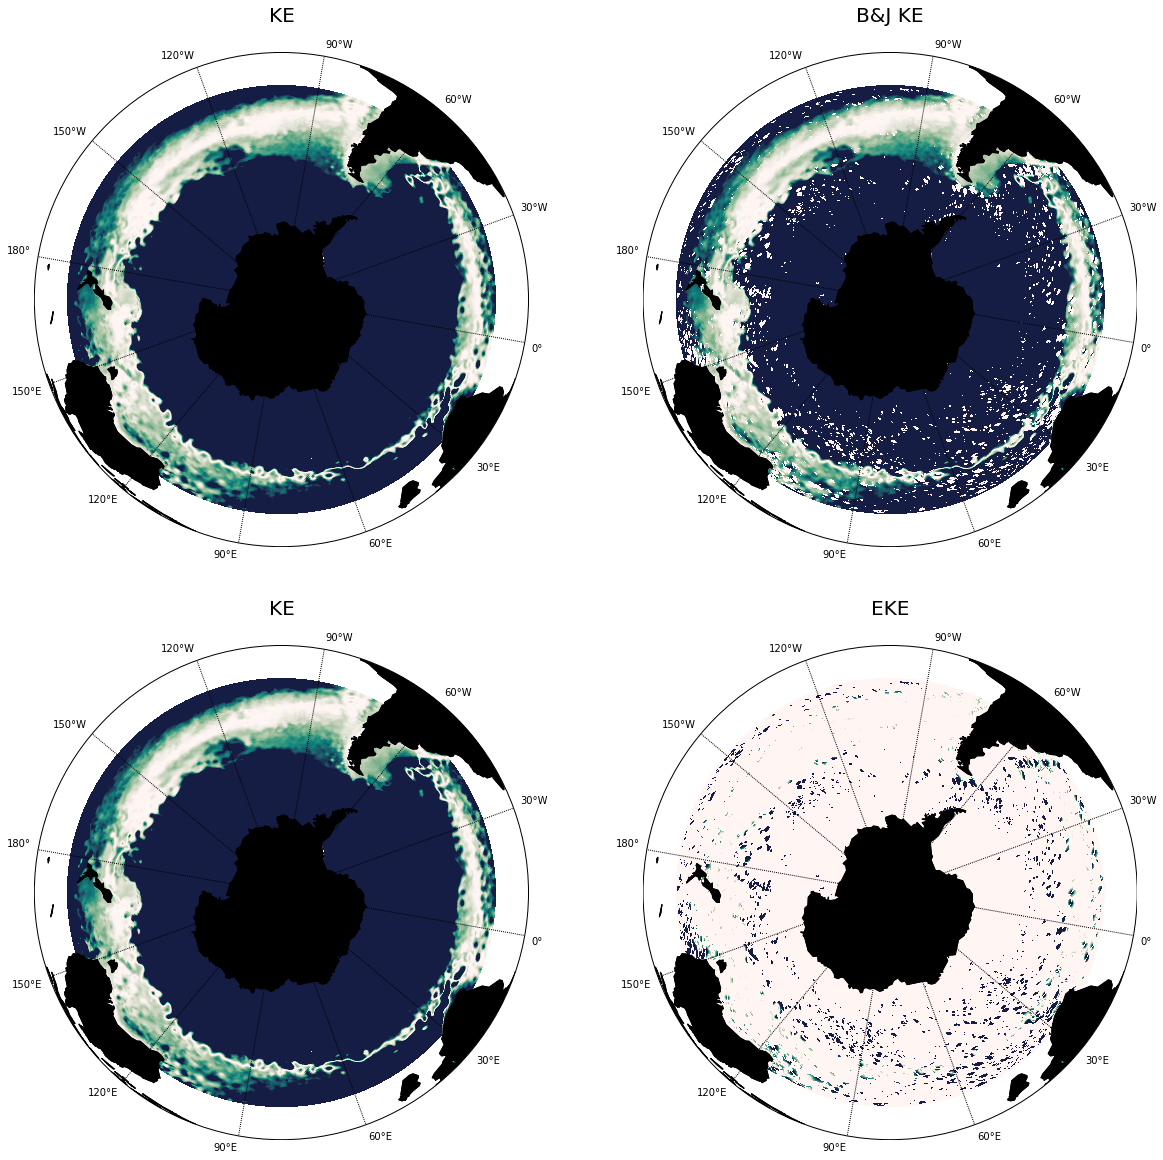

In [65]:
ke=KE(u_g,v_g)
basemap_mplot(lon,lat,[ke,bjke,ke,eke]\
              ,title=["KE","B&J KE","KE","EKE"],scale='Lin',cmap=cm.cm.tempo,\
              vmin=0,vmax=10,xan=2,yan=2,figsize=(20,20),fontsize=20);